<a href="https://colab.research.google.com/github/DanielaCorado/Portfolio/blob/main/Precifica%C3%A7%C3%A3o_de_im%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificação de imóveis**

*O setor imobiliário é um ramo do setor secundário da economia, que lida com a produção e a comercialização (neste caso a compra, a venda e o aluguel) dos bens imóveis.*

*Para este projeto estarei analisando as vendas de imóveis no estado de SP, com objetivo de predizer o valor do ímovel, podendo julgar se o preço é justo ou não.*

*Além de criar um modelo de machine machine learning para predizer os preços responderei algumas perguntas sobre o dataset, como por exemplo a relação do preço com a metragem ou distribuição de renda* 

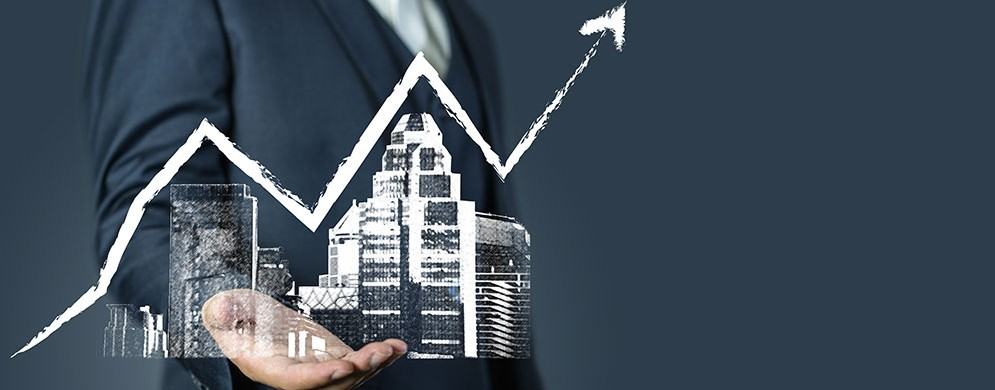

# **1- Conhecendo o dataset**

**Importando os dados:**

In [1]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

**5 primeiras linhas dos dados:**

In [2]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


**Alguns dados aleatório da base, para ver o comportamento geral:**

In [3]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
606,NaN,Jardim Everest,São Paulo,700,4,7,10,R$ 3.000.000
5667,NaN,Sumarezinho,São Paulo,253,4,3,4,R$ 20.000\n /Mês
3254,Rua Itajaçu,Pacaembu,São Paulo,279,3,5,3,R$ 1.950.000
2523,NaN,Jardim Guedala,São Paulo,725,3,8,10,R$ 25.000\n /Mês
4678,Avenida Ireré,Planalto Paulista,São Paulo,361,3,4,4,R$ 2.200.000
7746,NaN,Vila Congonhas,São Paulo,120,3,2,2,R$ 763.200
8529,"Rua Bartolomeu Pagano, 28",Vila Dorna,São Paulo,560,4,6,8,R$ 850.000
6572,NaN,Brooklin Paulista,São Paulo,363,3,5,4,R$ 1.600.000
2187,Avenida Tomás de Sousa,Jardim Monte Azul,São Paulo,325,4,5,7,R$ 1.000.000
4139,Rua Araçatuba,Vila Ipojuca,São Paulo,177,3,4,3,R$ 1.300.000


* Observando os dados de forma aleátoria é possíve perceber alguns dados faltantes na coluna 'Rua'

**Informações sobre o dataset:**

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


* Com as informações sobre o Dataset temos que a coluna 'Valores' tem tipo object, por se tratar de um número terei que transforma-la em uma variável do tipo float 

* Aqui também podemos obter o número de linhas e colunas do nosso dataset, além do nome de cada uma das colunas e seu tipo de variável

# **2- Respondendo algumas perguntas sobre os dados:**

**Média das metragens:**

In [5]:
dados["Metragem"].mean()

442.30065947242207

**Total de imóveis no bairro Villa Mariana:**



In [6]:
sum((dados["Bairro"] == "Vila Mariana"))

184

**Média de imóveis no bairro Villa Mariana:**

In [7]:
tem_imoveis_vila =(dados["Bairro"] == "Vila Mariana")
imoveis_vila_mariana = dados[tem_imoveis_vila]
imoveis_vila_mariana["Metragem"].mean()



233.6195652173913

**Total de imóveis em cada um dos bairros:**

In [8]:
dados["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
n_imoveis_bairro = dados["Bairro"].value_counts()

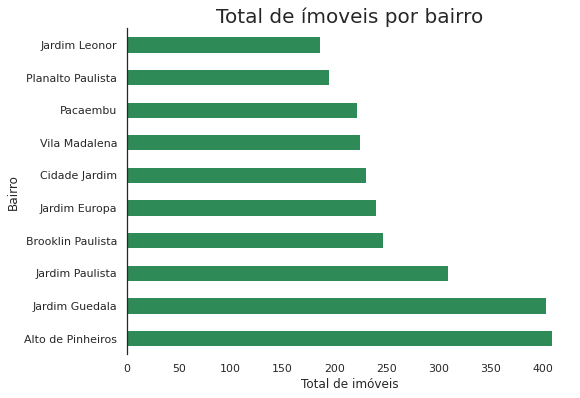

In [11]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = n_imoveis_bairro.head(10).plot.barh(color='seagreen')
sns.despine(bottom='True')
ax.set_title("Total de ímoveis por bairro", fontsize=20)
plt.ylabel('Bairro', fontsize=12)
plt.xlabel('Total de imóveis', fontsize = 12)
plt.show()

**Média da metragem para cara um dos bairros:**

In [12]:
med_metragem_bairro = dados.groupby(['Bairro'])['Metragem'].mean()
med_metragem_bairro

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

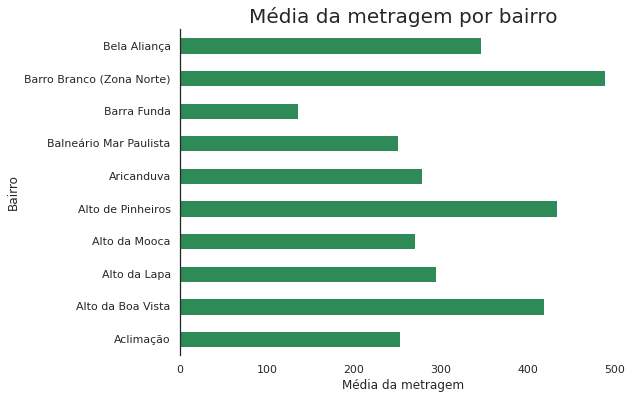

In [13]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = med_metragem_bairro.head(10).plot.barh(color='seagreen')
sns.despine(bottom='True')
ax.set_title("Média da metragem por bairro", fontsize=20)
plt.ylabel('Bairro', fontsize=12)
plt.xlabel('Média da metragem', fontsize = 12)
plt.show()

# **3- Mudando o type da coluna Valores**

A coluna valores está com os dados com tipo object o que impossibilita calculos matemáticos, para solucionar o problema precisa mudar o tipo do dado para float

In [14]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6758,NaN,Jardim Cidália,São Paulo,230,3,4,8,R$ 845.000
6877,NaN,Bosque da Saúde,São Paulo,255,3,1,10,R$ 1.900.000
4339,Rua Crisólita,Jardim da Glória,São Paulo,186,2,2,3,R$ 1.400.000
9198,Rua Adonis,São João Clímaco,São Paulo,120,2,1,2,R$ 510.000
1123,NaN,Vila Madalena,São Paulo,253,3,4,3,R$ 4.400.000
8421,NaN,Saúde,São Paulo,140,3,1,2,R$ 1.190.000
2780,Rua Cuba,Jardim América,São Paulo,306,4,5,4,R$ 4.200.000
1846,Rua Consórcio,Vila Nova Conceição,São Paulo,271,4,4,4,R$ 2.800.000
7886,NaN,Brooklin Paulista,São Paulo,500,3,4,8,R$ 1.850.000
1200,Rua Euclídes de Andrade,Pompeia,São Paulo,85,2,2,2,R$ 990.000


* Na coluna valor temos o cifrão e em alguns casos outras letras que precisam ser separadas dos numeros, que é o que nos interessa

In [15]:
dados["Valor"].str.split(expand = True) # Separando os dados de valor para retirar o cifrão e outras str que posso está presente 

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


* Verificar como é composta a coluna 0




In [16]:
len(dados["Valor"].str.split(expand = True)[0].unique())

1

In [17]:
dados["Valor"].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

* Como só tem um valor único sabemos que está tudo certo com a coluna 0, e que ela é composta somente por R$

* Verificar como é composta a coluna 2:



In [18]:
dados["Valor"].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

* Temos então que a coluna 2 é composta apenas pelos dados acima, não contendo nenhum número

* Os dados da coluna 2 tem relação com os imóveis alugados, como o que nos intesssa são os imóveis comprados, esses dados seram excluidos do dataframe final

* Após verificar as colunas do dataframe gerado, sabemos que os dados númerico estão todos presentes na coluna 1

**Inserir as colunas novas nos dados**

In [19]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


* Removendo os dados de aluguel

In [20]:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()

array([None], dtype=object)

In [21]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


* Verificando se os dados de aluguel foram removidos

In [22]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


**Criando nova coluna valor_anuncio_float**

In [23]:
dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [24]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


* Finalmente temos a nova coluna Valor Anuncio Float com os valores de vendas com dtype float 

# **4- Análise exploratória dos dados**

**Análise estatistica dos dados**

In [26]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [27]:
dados_vendas[["Rua", "Bairro", "Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


 **Valor dos ímoveis**

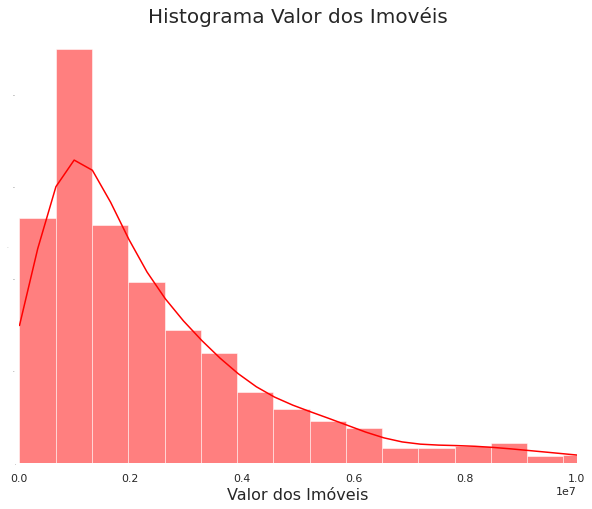

In [28]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True, color="red", bins=100)
sns.despine(bottom='True', left='true')
ax.set_title("Histograma Valor dos Imovéis", fontsize=20)
plt.tick_params(axis = 'y', labelsize=0, length = 0)
plt.ylabel([], fontsize=0)
plt.xlabel('Valor dos Imóveis', fontsize = 16)
plt.xlim((0, 10000000))
plt.show()


**Valor do metro quadrado de acordo com o bairro**

In [29]:
preco_m2 = dados_vendas['Valor_anuncio_float']/dados_vendas['Metragem']
preco_m2

0       7000.00
1       7459.68
2       3040.00
3       2209.68
4       5400.00
          ...  
10002   5617.98
10003   7000.00
10004   3801.65
10005   5121.95
10007   2213.11
Length: 9156, dtype: float64

In [30]:
dados_vendas["Valor m2"] = dados_vendas['Valor_anuncio_float']/dados_vendas['Metragem']
dados_vendas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95


**Método 1 de calcular a média do metro quadrado do imóvel por bairro**

In [31]:
preco_m2_bairro = dados_vendas.groupby(['Bairro'])['Valor m2'].mean()
preco_m2_bairro


Bairro
Aclimação            7656.17
Alto da Boa Vista    5849.57
Alto da Lapa         7606.73
Alto da Mooca        5691.74
Alto de Pinheiros   11269.98
                      ...   
Vila Água Funda      4467.13
Água Branca          7269.11
Água Fria            5841.10
Água Funda           3876.86
Água Rasa            4509.61
Name: Valor m2, Length: 697, dtype: float64

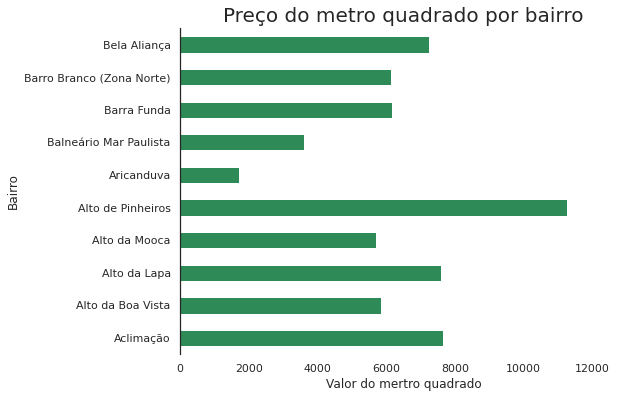

In [32]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = preco_m2_bairro.head(10).plot.barh(color='seagreen')
sns.despine(bottom='True')
ax.set_title("Preço do metro quadrado por bairro", fontsize=20)
plt.ylabel('Bairro', fontsize=12)
plt.xlabel('Valor do mertro quadrado', fontsize = 12)
plt.xlim((0, 13000))
plt.show()


**Método 2 de calcular a média do metro quadrado do imóvel por bairro**

É mais interessante calcular a média ponderada poís existe alguns imóveis com valores descrepantes

In [33]:
dados_bairro = dados_vendas.groupby("Bairro").sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor m2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


In [34]:
dados_bairro["Valor_m2_bairro"] = dados_bairro["Valor_anuncio_float"]/dados_bairro["Metragem"]
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53


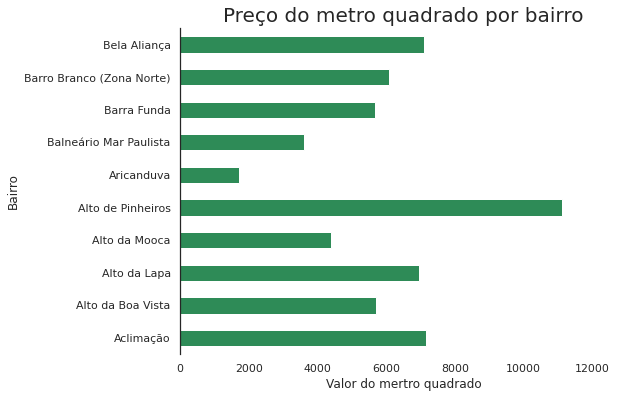

In [35]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = dados_bairro['Valor_m2_bairro'].head(10).plot.barh(color='seagreen')
sns.despine(bottom='True')
ax.set_title("Preço do metro quadrado por bairro", fontsize=20)
plt.ylabel('Bairro', fontsize=12)
plt.xlabel('Valor do mertro quadrado', fontsize = 12)
plt.xlim((0, 13000))
plt.show()


# **5- Bairros mais caros**

**Calculando os bairros mais caros**

In [36]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index
top_bairros

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [37]:
dados_bairro.reset_index(inplace = True)
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor m2,Valor_m2_bairro
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
693,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
694,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53
695,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86


In [38]:
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82


**Vizualizando os bairros mais caros**

**Gráfico 1: Histograma**

Text(0.5, 0, 'Valor do mertro quadrado')

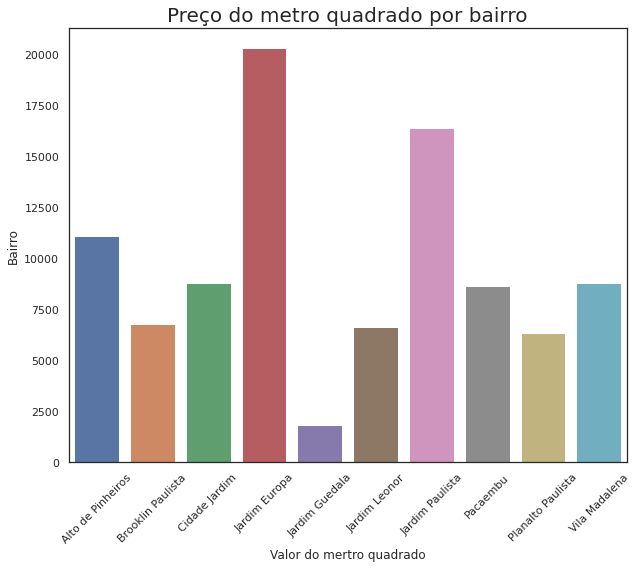

In [39]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=dados_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis='x',rotation=45)
ax.set_title("Preço do metro quadrado por bairro", fontsize=20)
plt.ylabel('Bairro', fontsize=12)
plt.xlabel('Valor do mertro quadrado', fontsize = 12)


**Gráfico 2: Boxplot com valor do ímovel**

Coloquei a condição de Valor_anuncio_float menor que 60.000.00 R$ para tirar ponto discrepante

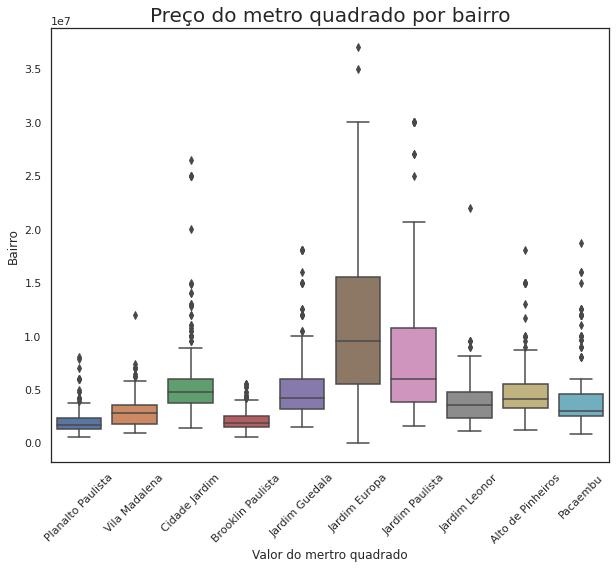

In [40]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Valor_anuncio_float < 60000000"), x="Bairro", y="Valor_anuncio_float")
ax.tick_params(axis='x', rotation=45)
ax.set_title("Preço do metro quadrado por bairro", fontsize=20)
plt.ylabel('Bairro', fontsize=12)
plt.xlabel('Valor do mertro quadrado', fontsize = 12)
plt.show()

**Gráfico 3: Boxplot com metragem dos ímoveis**

Coloquei a condição de metragem menor que 30.000m2 para tirar ponto discrepante

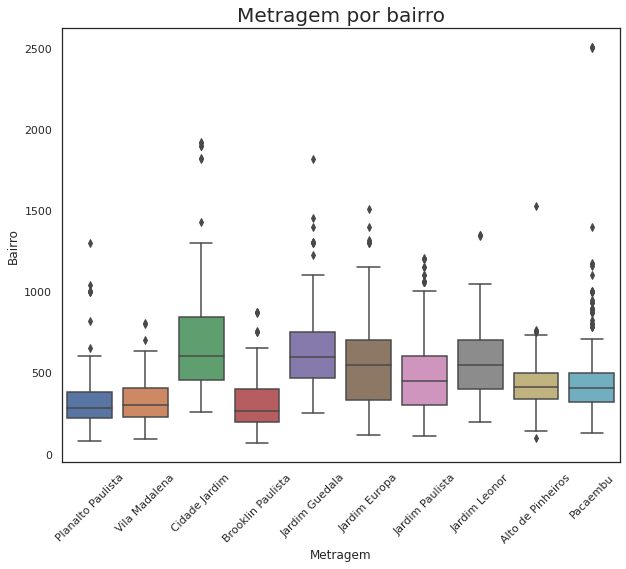

In [41]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
ax.set_title("Metragem por bairro", fontsize=20)
plt.ylabel('Bairro', fontsize=12)
plt.xlabel('Metragem', fontsize = 12)
plt.show()

# **6- Incluindo novos dados para complentar nosso dataset**

**Importando os dados do IBGE**

In [42]:
import pandas as pd
ibge_sp = pd.read_csv(
    'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
    encoding='ISO-8859-1',
    sep=';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [43]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

**Importando dados dos endereços de SP**

In [45]:
enderecos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfólio/02 - Análise Imobiliária SP/enderecos.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
enderecos.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


In [47]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35
...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.00,-22.93,-47.27
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.00,-21.24,-47.83
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.00,-21.20,-47.74
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.00,-23.19,-47.08


**Crinado mais uma varável Rua no dataset enderecos**

In [48]:
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


In [49]:
dados_vendas["Rua"].str.extract(r'(^[\w ]+)')[:10]

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


**Crinado mais uma varável Rua no dataset dados_vendas**

In [50]:
dados_vendas["apenas_rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')
dados_vendas["apenas_rua"] = dados_vendas["apenas_rua"].str.lower().str.strip()
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor m2,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto


**Unindos os dois dataset**

In [51]:
dados_geo = pd.merge(left = dados_vendas, right = enderecos_sp[["rua", "cep", "latitude", "longitude"]], 
                     how = "left", left_on = "apenas_rua", right_on = "rua").drop_duplicates(subset=dados_vendas.columns).query("cep > 0")
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor m2,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63


**A base de dados ibge_sp não contém os dados de longitude e latitude, para inserir temos :**

In [52]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

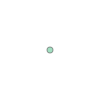

In [53]:
from shapely.geometry import Point
latitude = -23.56 	
longitude = -46.59
Point(longitude, latitude)

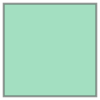

In [54]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

In [55]:
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).contains(Point(0.1,0.9))

True

In [56]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.4 MB/s 
     |████████████████████████████████| 6.3 MB 42.1 MB/s 
     |████████████████████████████████| 16.7 MB 37.9 MB/s 


In [57]:
import geopandas as gpd

In [58]:
setor_censo = gpd.read_file(
    "/content/drive/MyDrive/Colab Notebooks/Portfólio/02 - Análise Imobiliária SP/sp_setores_censitarios/35SEE250GC_SIR.shp"
)
setor_censo.head()


,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [59]:
from shapely.geometry import Point

In [60]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]
setor_censo_sp[setor_censo_sp.contains(Point(-46.63, -23.58))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
60986,126568.00,355030890000080,URBANO,35503089000,None,355030890,VILA MARIANA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,60987,"POLYGON ((-46.62618 -23.58169, -46.62863 -23.5..."


**Crianda nossa base de dados final, que será usada no modelo de machine learning**

In [61]:
dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"][:10].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor m2,apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN,NaN,18125000.00,-23.53,-47.26,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),NaN
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),NaN
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08,POINT (-47.0769595 -22.9227492),NaN
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),NaN


In [62]:
dados_geo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfólio/02 - Análise Imobiliária SP/dados_geo.csv")
dados_geo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00


In [63]:
dados_vendas_censo = pd.merge(left = dados_geo, right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [64]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5605 non-null   object 
 1   Bairro                 5597 non-null   object 
 2   Cidade                 5605 non-null   object 
 3   Metragem               5605 non-null   int64  
 4   Quartos                5605 non-null   int64  
 5   Banheiros              5605 non-null   int64  
 6   Vagas                  5605 non-null   int64  
 7   Valor                  5605 non-null   object 
 8   Valor_anuncio          5605 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5605 non-null   float64
 11  Valor_m2               5605 non-null   float64
 12  rua                    5605 non-null   object 
 13  cep                    5605 non-null   float64
 14  latitude               5605 non-null   float64
 15  long

**Relação do valor do ímovel com o rendimento nominal mensal das pessoas responsáveis pelo imóvel**

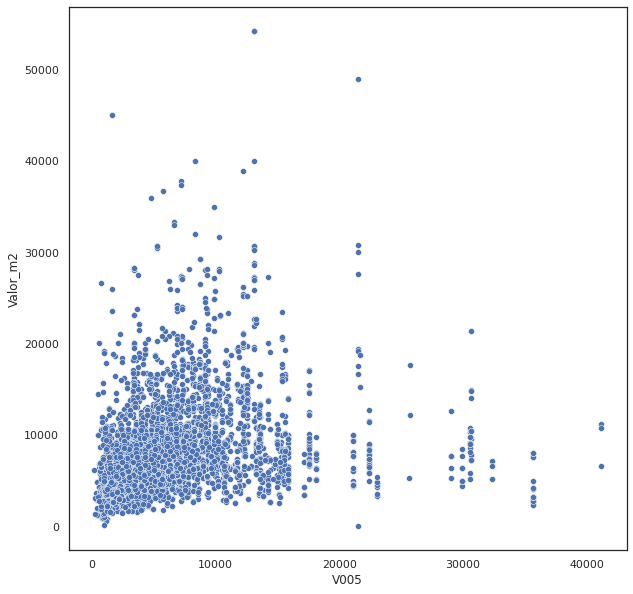

In [65]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="V005", y="Valor_m2")

# **7- Machine Learning**

**Observar nossa base de dados final**

In [66]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5605 non-null   object 
 1   Bairro                 5597 non-null   object 
 2   Cidade                 5605 non-null   object 
 3   Metragem               5605 non-null   int64  
 4   Quartos                5605 non-null   int64  
 5   Banheiros              5605 non-null   int64  
 6   Vagas                  5605 non-null   int64  
 7   Valor                  5605 non-null   object 
 8   Valor_anuncio          5605 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5605 non-null   float64
 11  Valor_m2               5605 non-null   float64
 12  rua                    5605 non-null   object 
 13  cep                    5605 non-null   float64
 14  latitude               5605 non-null   float64
 15  long

* Nossa base de dados está com muitas informações, vamos filtrar o que de fato nos interessa para o modelo de machine learning

**Importando as bibliotecas e carregando os dados de interesse**

---



In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

dados_vendas_censo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfólio/02 - Análise Imobiliária SP/dados_vendas_censo.csv")
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


**Boxplot da variável Valor_Anuncio** 

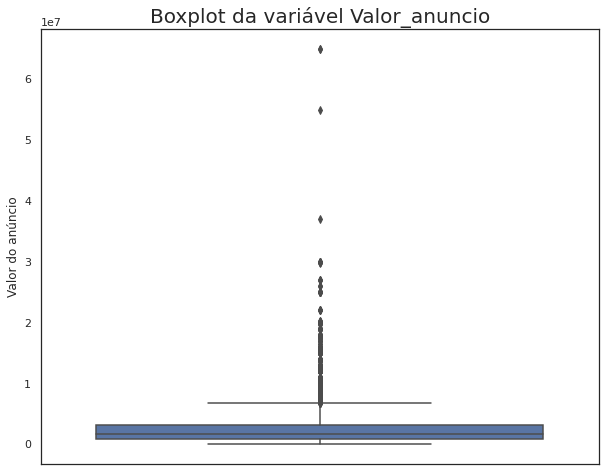

In [69]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
ax.set_title("Boxplot da variável Valor_anuncio", fontsize=20)
plt.ylabel('Valor do anúncio', fontsize = 12)
plt.show()


**Boxplot da variável Valor_Anuncio retirando dados discrepantes**

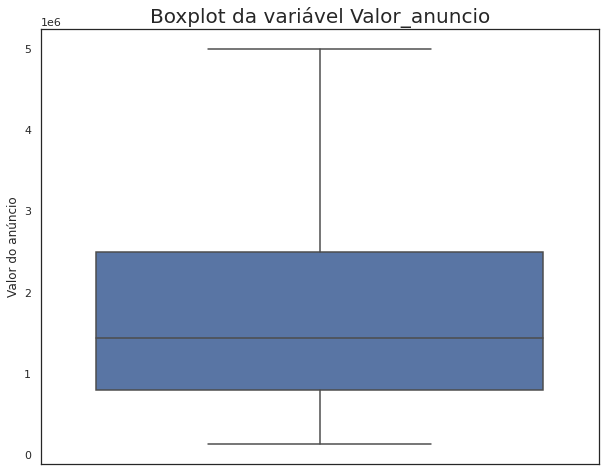

In [70]:
dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 5000000 | Valor_anuncio < 100000").index, inplace = True)
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
ax.set_title("Boxplot da variável Valor_anuncio", fontsize=20)
plt.ylabel('Valor do anúncio', fontsize = 12)
plt.show()

**Relação do valor do metro quadrado com o valor_anuncio**

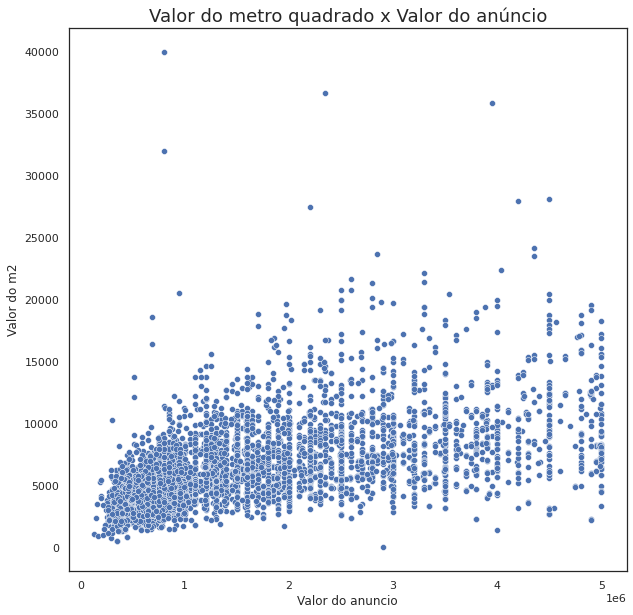

In [71]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="Valor_anuncio", y="Valor_m2")
plt.title ('Valor do metro quadrado x Valor do anúncio', fontsize = 18)
plt.ylabel('Valor do m2', fontsize = 12)
plt.xlabel('Valor do anuncio', fontsize = 12)
plt.show()

**Correlação dos dados**

Uma das formas mais usadas para ver as correlações entre os dados é usar o pairplot, porém nesse caso fica inviável devido ao número de colunas. Para ver as correlações nesse caso foi usado:

In [72]:
dados_vendas_censo.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.16,0.15,0.19,0.23,0.23,-0.07,-0.09,-0.10,0.52,...,0.09,0.03,0.16,0.04,0.16,0.04,0.13,0.04,0.14,0.03
Quartos,0.16,1.00,0.52,0.38,0.43,0.43,0.01,-0.02,-0.16,-0.00,...,0.12,0.05,0.27,0.09,0.28,0.08,0.26,0.09,0.27,0.07
Banheiros,0.15,0.52,1.00,0.41,0.51,0.51,0.06,-0.04,-0.22,-0.02,...,0.16,0.03,0.36,0.09,0.36,0.08,0.34,0.09,0.35,0.08
Vagas,0.19,0.38,0.41,1.00,0.45,0.45,-0.04,-0.04,-0.16,-0.01,...,0.20,0.05,0.29,0.09,0.29,0.07,0.25,0.08,0.27,0.06
Valor_anuncio,0.23,0.43,0.51,0.45,1.00,1.00,0.51,0.02,-0.33,-0.01,...,0.07,-0.00,0.57,0.13,0.57,0.10,0.59,0.13,0.57,0.10
Valor_mm,0.23,0.43,0.51,0.45,1.00,1.00,0.51,0.02,-0.33,-0.01,...,0.07,-0.00,0.57,0.13,0.57,0.10,0.59,0.13,0.57,0.10
Valor_m2,-0.07,0.01,0.06,-0.04,0.51,0.51,1.00,0.05,-0.18,-0.04,...,-0.26,-0.06,0.20,0.01,0.19,0.00,0.30,0.01,0.24,0.00
latitude,-0.09,-0.02,-0.04,-0.04,0.02,0.02,0.05,1.00,0.16,-0.03,...,-0.06,0.03,-0.05,-0.09,-0.07,-0.08,-0.04,-0.07,-0.07,-0.06
longitude,-0.10,-0.16,-0.22,-0.16,-0.33,-0.33,-0.18,0.16,1.00,-0.02,...,-0.01,0.04,-0.35,-0.09,-0.35,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.52,-0.00,-0.02,-0.01,-0.01,-0.01,-0.04,-0.03,-0.02,1.00,...,0.03,0.00,-0.03,-0.01,-0.03,-0.00,-0.03,-0.01,-0.03,-0.00


* Os valores negativos indicam que os dados são inversamente correlacionados 
* Valores próximos de 1 ou -1 indicam que os dados tem uma maior correlação
* Valores proximos de 0 indicam haver pouca correlação

**Gráfico com as correlações dos dados**

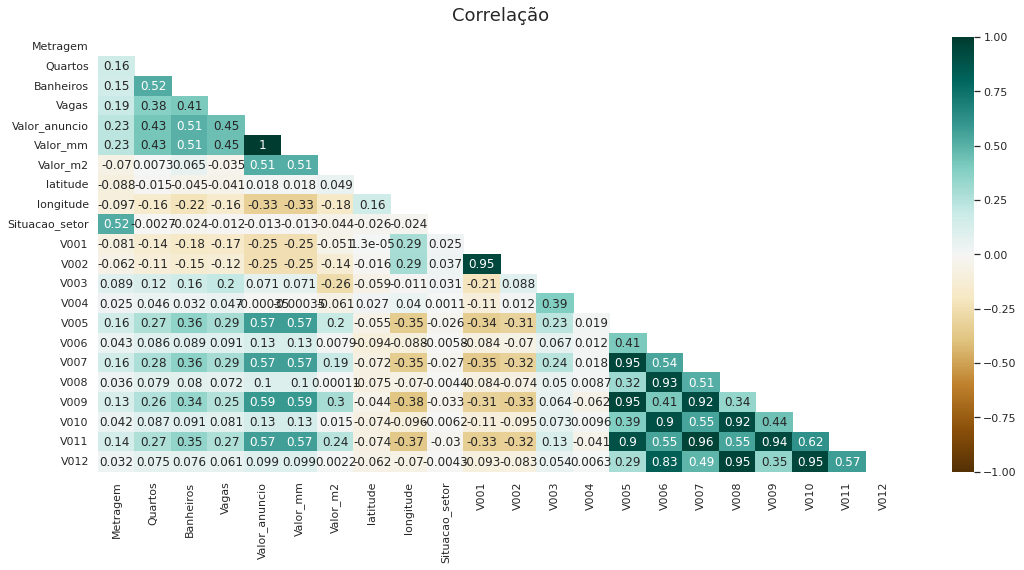

In [73]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

* Com o gráfico é mais fácil visulaizar os dados com maior correlaçao com o valor do imóvel, como o V009, V007 e V005 referentes a rendas das famílias
* Não é interessante usar o valor_m2 como varável do nosso modelo de regressão pois esse dado foi calculado usando a nossa resposta valor_anuncio

**Para o projeto em questão vamos usar modelo de machine learning para dados supervisionado, a regressão**

**Regressão Linear**

* **Modelo usando somente uma variável, a metragem**

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dados_vendas_censo[["Metragem"]]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 54)
lr = LinearRegression()

In [ ]:
X_train

,Metragem
4961,181
4146,287
3085,385
2809,160
2979,110
...,...
2562,395
4101,350
4598,78
4647,288


In [75]:
lr.fit(X_train, Y_train)

LinearRegression()

In [76]:
Y_predict_test = lr.predict(X_test)

In [77]:
Y_test

4936   1300000.00
1667   1950000.00
4638    532000.00
4749   1300000.00
841    3000000.00
          ...    
3189    980000.00
1384   3000000.00
5419    380000.00
3031   2240000.00
3889   3400000.00
Name: Valor_anuncio, Length: 1405, dtype: float64

In [78]:
Y_predict_train = lr.predict(X_train)

In [79]:
Y_train

4961   1490000.00
4146   1090000.00
3085   3200000.00
2809   1700000.00
2979    485000.00
          ...    
2562   4500000.00
4101   1750000.00
4598    350000.00
4647   2190000.00
1151   2500000.00
Name: Valor_anuncio, Length: 3277, dtype: float64

* Verificando a eficiência do modelo

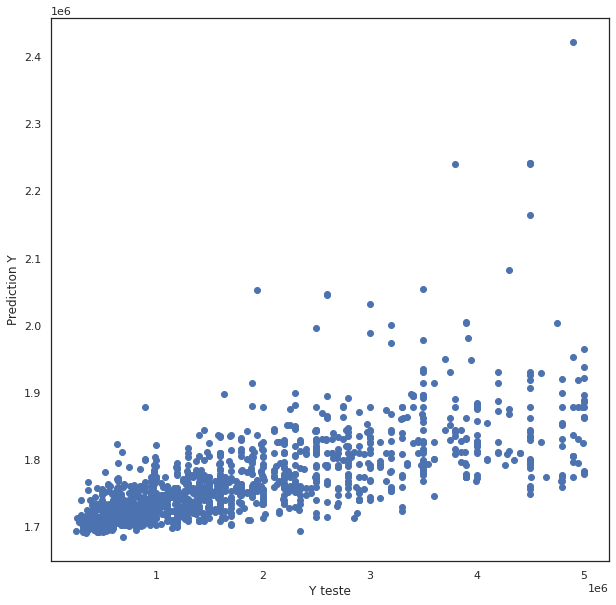

In [80]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 10))
prediction = lr.predict(X_test)
plt.scatter(Y_test,prediction)
plt.xlabel('Y teste')
plt.ylabel('Prediction Y')
plt.show()

In [81]:
from sklearn import metrics
print('--'*30)
print('MAE :',metrics.mean_absolute_error(Y_test,prediction))
print('MSE :', metrics.mean_squared_error(Y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

------------------------------------------------------------
MAE : 959585.4351301627
MSE : 1367103968940.3665
RMSE : 1169232.2134376757


* **Modelo usando varáveis com correlação interessante com o valor anúncio**

In [82]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V007', 'V009']]
# Variávei com maiores correlações com Valor anuncio

Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)

LinearRegression()

In [83]:
prediction = lr.predict(X_test)

In [84]:
from sklearn import metrics
print('--'*30)
print('MAE :', metrics.mean_absolute_error(Y_test,prediction))
print('MSE :', metrics.mean_squared_error(Y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

------------------------------------------------------------
MAE : 596067.828338563
MSE : 676022786487.8071
RMSE : 822206.048681112


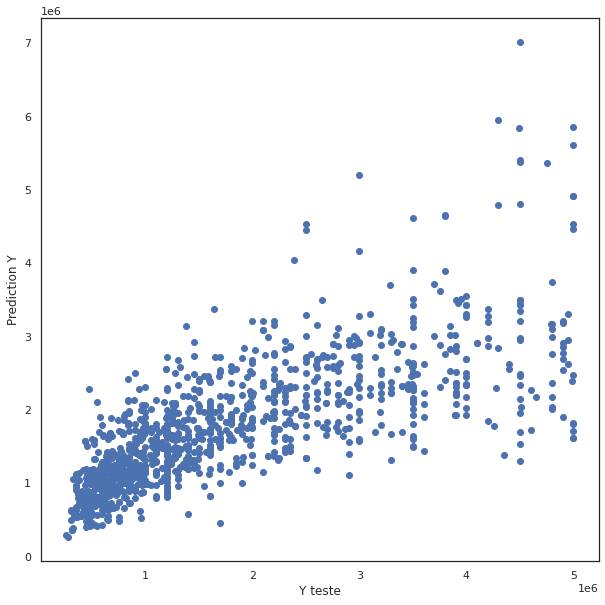

In [85]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 10))
prediction = lr.predict(X_test)
plt.scatter(Y_test,prediction)
plt.xlabel('Y teste')
plt.ylabel('Prediction Y')
plt.show()

* Pelo gráfico é possível observar que até um valor de 5 milhões o modelo se comporta bem, porém para valores muito alto ele dispersa, isso se ocorre pela pouca quantidade de dados com valores acima de 5 milhões.

* Os resultados ainda continuam ruins, com erros elevados

**Support Vector Machines**

In [86]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V002','V003','V004','V005','V006',
                        'V007','V008','V009', 'V010','V011','V012']]

Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)

In [87]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
prediction = model.predict(X_test)

In [88]:
from sklearn import metrics
print('--'*30)
print('MAE :',metrics.mean_absolute_error(Y_test,prediction))
print('MSE :', metrics.mean_squared_error(Y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

------------------------------------------------------------
MAE : 913798.6780529462
MSE : 1404187783598.784
RMSE : 1184984.296773077


**Árvore de decisão**

In [89]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V002','V003','V004','V005','V006',
                        'V007','V008','V009', 'V010','V011','V012']]

Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)

In [90]:
from sklearn.tree import DecisionTreeRegressor
final_data = DecisionTreeRegressor(max_depth = 3)
final_data.fit(X_train,Y_train) # Treinando o modelo
prediction = final_data.predict(X_test) # Predições

In [91]:
from sklearn import metrics
print('--'*30)
print('MAE :',metrics.mean_absolute_error(Y_test,prediction))
print('MSE :', metrics.mean_squared_error(Y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

------------------------------------------------------------
MAE : 537194.8133020574
MSE : 549441178542.6605
RMSE : 741242.9956111966


**Floresta aleatória**

In [92]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V002','V003','V004','V005','V006',
                        'V007','V008','V009', 'V010','V011','V012']]

Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)

In [93]:
from sklearn.ensemble import RandomForestRegressor
final_data = RandomForestRegressor(n_estimators=200) # Define o número de árvores aleátorias
final_data.fit(X_train,Y_train) # Treinando o modelo
prediction  = final_data.predict(X_test) # Predições

In [94]:
from sklearn import metrics
print('--'*30)
print('MAE :',metrics.mean_absolute_error(Y_test,prediction))
print('MSE :', metrics.mean_squared_error(Y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

------------------------------------------------------------
MAE : 315716.7941514308
MSE : 250243220757.2896
RMSE : 500243.16162971145


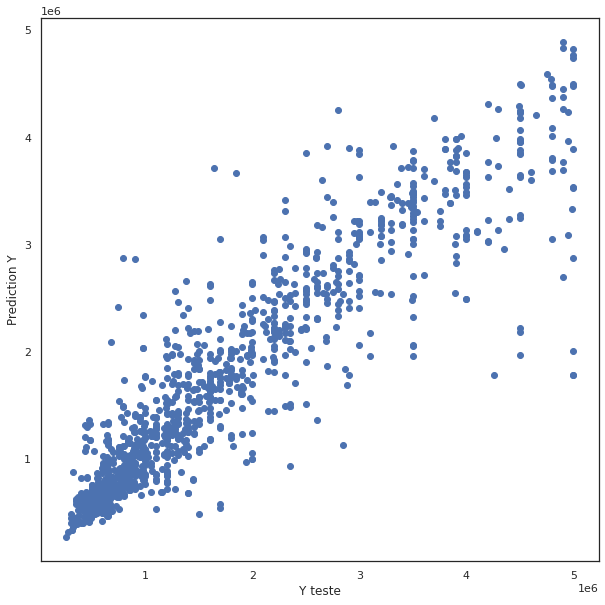

In [95]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 10))
prediction  = final_data.predict(X_test)
plt.scatter(Y_test,prediction)
plt.xlabel('Y teste')
plt.ylabel('Prediction Y')
plt.show()

In [107]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, X, Y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()

In [109]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, X, Y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança 392331557745.4735 - 913742873468.274


In [110]:
resultados["test_score"]*-1

array([6.23282692e+11, 9.72315069e+11, 7.21322345e+11, 6.66273987e+11,
       6.49757467e+11, 6.69338971e+11, 6.80209525e+11, 5.63279355e+11,
       5.19776367e+11, 4.64816377e+11])

In [111]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [113]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

SEED= 1232
np.random.seed(SEED)



partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, X, Y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 443618458518.7898 - 696170180942.2751


In [115]:
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, X, Y, cv= partes, 
                                scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(4)

Treino = 480677679254.5685|Teste = 518345073404.8926


In [116]:
for i in range(1,21):
    regressor_arvore(i)

Treino = 827698233854.2513|Teste = 832286175475.6484
Treino = 626946400273.484|Teste = 647013680297.3245
Treino = 538005589077.8924|Teste = 569894319730.5325
Treino = 480677679254.5685|Teste = 518345073404.8926
Treino = 434491851344.03534|Teste = 497911354929.85675
Treino = 385644064999.9187|Teste = 477310475620.395
Treino = 332913163329.0274|Teste = 463916057941.2539
Treino = 276422682047.39954|Teste = 438325499626.4759
Treino = 222902891096.9809|Teste = 423965281713.06555
Treino = 175504457663.4875|Teste = 416277489996.1431
Treino = 134024658566.07832|Teste = 413084669652.25885
Treino = 98391467764.41397|Teste = 405862148160.9705
Treino = 69719281600.22504|Teste = 396050279073.8426
Treino = 48476704255.781654|Teste = 393702630495.08264
Treino = 33264670789.08803|Teste = 388981565358.52045
Treino = 22029694349.499413|Teste = 395795788095.6976
Treino = 14390824922.549906|Teste = 406900894630.2671
Treino = 9526946606.745111|Teste = 399102218288.4376
Treino = 6563643529.216301|Teste = 40

**Regressão Logistica**

In [97]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V002','V003','V004','V005','V006',
                        'V007','V008','V009', 'V010','V011','V012']]

Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)

In [98]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
prediction = logmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [99]:
from sklearn import metrics
print('--'*30)
print('MAE :',metrics.mean_absolute_error(Y_test,prediction))
print('MSE :', metrics.mean_squared_error(Y_test,prediction))
print('RMSE :',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

------------------------------------------------------------
MAE : 2549694.2988898377
MSE : 8096700115622.695
RMSE : 2845470.1045034183


# **Referência** 

**Os dados originais do projeto estão disponíveis no Kaglle:**

https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo 

**Esses dados foram tratados previamente e encontram-se no link:**
https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv

**Dados do IBGE:** https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv

**Dicionário de dados do IBGE:** https://drive.google.com/file/d/1WVTqfKtHOOk5X1AWaSOn6NLaO7cix2m4/view

**Dados de endereços:** https://drive.google.com/file/d/1u2qPFtYaE4of3Vb3d7yQEVEbS5FdQ_FP/view

**Dados setores censitários:** https://drive.google.com/drive/folders/1CycoanzYN2oxKHPO6zxvIQ6Og1LBcujv

**Documentação dos modelos de regressão**

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning